## importing libraries

In [1]:
import numpy as np
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
#!pip install selenium
from selenium import webdriver
import seaborn as sns
import matplotlib.pyplot as plt

## copying url

In [2]:
url='https://www.imdb.com/list/ls050782187/'
url

'https://www.imdb.com/list/ls050782187/'

In [3]:
page=requests.get(url)
page

<Response [200]>

In [4]:
soup=BeautifulSoup(page.text)

In [5]:
a=soup.find_all('h3',class_="lister-item-header")  ## title
b=soup.find_all('span',class_="runtime")  # runtime
c=soup.find_all('span',class_="certificate")   # certificate
d=soup.find_all('span', class_="genre")  # genre
e=soup.find_all('div',class_="inline-block ratings-metascore")  # metascore
f=soup.find_all('p',class_="text-muted text-small")  # gross

# code

In [6]:
title=[]
runtime=[]
year=[]
certificates=[]
genre=[]
metascore=[]
gross=[]


for i in range(1,6):
    url=(f'https://www.imdb.com/list/ls050782187/?sort=list_order,asc&st_dt=&mode=detail&page=1={i}')
    driver=webdriver.Chrome(r"C:\Users\Shanm\Downloads\chromedriver_win32\chromedriver.exe")
    driver.get(url)
    soup=BeautifulSoup(driver.page_source,'html.parser')
    driver.close() 
    for i in a:
        text=i.text
        regex=re.findall('[ [a-zA-Z]+',text)
        title.append(regex[0])
    for i in b:
        text=i.text
        regex=re.findall('[0-9]+\smin',text)  # runtime
        runtime.append(regex[0]) 
        
        
    for i in a:
        text=i.text
        regex=re.findall('[0-9]{4}',text)       # year
        if regex:
            year.append(regex[0]) 
        else:
            year.append(np.nan)
        
        
        
    for i in soup.find_all("div",class_="lister-item mode-detail"):
        c=i.find('div',class_="sc-b5e8e7ce-2 AIESV")
        text = i.text
        regex=re.findall('(UA|G|A|U|PG|R|18)',text)       # certificates
        if regex:
            certificates.append(regex[0])
        else:
            certificates.append(np.nan)
            
   
    for i in d:
        text=i.text
        if genre:
            genre.append(i.text)                # genre
        else:
            genre.append(np.nan)
    
    
    for i in soup.find_all("div",class_="lister-item mode-detail"):
        e=i.find('div',class_='inline-block ratings-metascore')
        text=i.text 
        regex=re.findall('([0-9]+)',text)                       # metascore
        if regex:
            metascore.append(regex[0])
        else:
            metascore.append(np.nan)  
            
    for i in soup.find_all("div",class_="lister-item mode-detail"):           # gross
        f=i.find('p',class_='text-muted text-small')
        text=i.text 
        regex=re.findall('[].[0-9]+M',text)
        if regex:
            gross.append(regex[0])
        else:
            gross.append(np.nan) 
            

C:\Users\Shanm\AppData\Local\Temp\ipykernel_14056\831508211.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(r"C:\Users\Shanm\Downloads\chromedriver_win32\chromedriver.exe")


## length of elements

In [7]:
print(len(title))
print(len(year))
print(len(runtime))
print(len(certificates))
print(len(metascore))
print(len(genre))
print(len(gross))







500
500
500
500
500
500
500


In [8]:
data={'title':title,'year':year,'runtime':runtime,'certificates':certificates,'metascore':metascore,'genre':genre,'gross':gross}

## data frame

In [9]:
Movie=pd.DataFrame(data)
Movie

,title,year,runtime,certificates,metascore,genre,gross
0,The Godfather,1972,175 min,G,1,NaN,134.97M
1,The Silence of the Lambs,1991,118 min,R,2,"\nCrime, Drama, Thriller",130.74M
2,The Empire Strikes Back,1980,124 min,PG,3,"\nAction, Adventure, Fantasy",290.48M
3,The Shawshank Redemption,1994,142 min,R,4,\nDrama,28.34M
4,The Shining,1980,146 min,R,5,"\nDrama, Horror",44.02M
...,...,...,...,...,...,...,...
495,Cool Hand Luke,1967,127 min,G,96,"\nCrime, Drama",16.22M
496,Eternal Sunshine of the Spotless Mind,2004,108 min,R,97,"\nDrama, Romance, Sci-Fi",34.40M
497,City Lights,1931,87 min,G,98,"\nComedy, Drama, Romance",0.02M
498,The Matrix,1999,136 min,R,99,"\nAction, Sci-Fi",171.48M


## transferring into csv file

In [10]:
Movie.to_csv('movie data.csv')

In [11]:
df = pd.read_csv(r"C:\Users\Shanm\movie data.csv")

# data frame

In [12]:
df

,Unnamed: 0,title,year,runtime,certificates,metascore,genre,gross
0,0,The Godfather,1972,175 min,G,1,NaN,134.97M
1,1,The Silence of the Lambs,1991,118 min,R,2,"\nCrime, Drama, Thriller",130.74M
2,2,The Empire Strikes Back,1980,124 min,PG,3,"\nAction, Adventure, Fantasy",290.48M
3,3,The Shawshank Redemption,1994,142 min,R,4,\nDrama,28.34M
4,4,The Shining,1980,146 min,R,5,"\nDrama, Horror",44.02M
...,...,...,...,...,...,...,...,...
495,495,Cool Hand Luke,1967,127 min,G,96,"\nCrime, Drama",16.22M
496,496,Eternal Sunshine of the Spotless Mind,2004,108 min,R,97,"\nDrama, Romance, Sci-Fi",34.40M
497,497,City Lights,1931,87 min,G,98,"\nComedy, Drama, Romance",0.02M
498,498,The Matrix,1999,136 min,R,99,"\nAction, Sci-Fi",171.48M


## data cleaning

In [13]:
df.drop(["Unnamed: 0"],axis = 1, inplace = True)

In [14]:
df["runtime"] = df["runtime"].str.replace(r'[min]',"")


C:\Users\Shanm\AppData\Local\Temp\ipykernel_14056\4041703924.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["runtime"] = df["runtime"].str.replace(r'[min]',"")


In [15]:
df['genre']=df['genre'].str.replace(r'[\n\,]','')

C:\Users\Shanm\AppData\Local\Temp\ipykernel_14056\4231359433.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['genre']=df['genre'].str.replace(r'[\n\,]','')


In [16]:
df['gross']=df['gross'].str.replace(r'[M]','')

C:\Users\Shanm\AppData\Local\Temp\ipykernel_14056\215466749.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['gross']=df['gross'].str.replace(r'[M]','')


In [17]:
df

,title,year,runtime,certificates,metascore,genre,gross
0,The Godfather,1972,175,G,1,NaN,134.97
1,The Silence of the Lambs,1991,118,R,2,Crime Drama Thriller,130.74
2,The Empire Strikes Back,1980,124,PG,3,Action Adventure Fantasy,290.48
3,The Shawshank Redemption,1994,142,R,4,Drama,28.34
4,The Shining,1980,146,R,5,Drama Horror,44.02
...,...,...,...,...,...,...,...
495,Cool Hand Luke,1967,127,G,96,Crime Drama,16.22
496,Eternal Sunshine of the Spotless Mind,2004,108,R,97,Drama Romance Sci-Fi,34.40
497,City Lights,1931,87,G,98,Comedy Drama Romance,0.02
498,The Matrix,1999,136,R,99,Action Sci-Fi,171.48


In [18]:
df.isnull().sum()

title           0
year            0
runtime         0
certificates    0
metascore       0
genre           1
gross           5
dtype: int64

In [19]:
df['genre'].fillna(df['genre'].mode()).iloc[[0]]

0    Drama            
Name: genre, dtype: object

In [20]:
df['genre'].fillna(df['genre'].mode(),inplace=True)
df['genre'].isnull().sum()

0

In [21]:
a=df[df['gross'].isnull()]
a

,title,year,runtime,certificates,metascore,genre,gross
65,To Have and Have Not,1944,100,A,66,Adventure Comedy Film-Noir,NaN
165,To Have and Have Not,1944,100,A,66,Adventure Comedy Film-Noir,NaN
265,To Have and Have Not,1944,100,A,66,Adventure Comedy Film-Noir,NaN
365,To Have and Have Not,1944,100,A,66,Adventure Comedy Film-Noir,NaN
465,To Have and Have Not,1944,100,A,66,Adventure Comedy Film-Noir,NaN


In [22]:
df["gross"]=df['gross'].astype(float)

In [23]:
df['gross'].fillna(df['gross'].mean(),inplace=True)

In [24]:
df.isnull().sum()

title           0
year            0
runtime         0
certificates    0
metascore       0
genre           0
gross           0
dtype: int64

In [25]:
df['gross'].fillna(df['gross'].mode(),inplace=True)
df['gross'].isnull().sum()

0

## cleaned dataframe

In [42]:
df

,title,year,runtime,certificates,metascore,genre,gross
0,The Godfather,1972,175,G,1,Drama,134.97
1,The Silence of the Lambs,1991,118,R,2,Crime Drama Thriller,130.74
2,The Empire Strikes Back,1980,124,PG,3,Action Adventure Fantasy,290.48
3,The Shawshank Redemption,1994,142,R,4,Drama,28.34
4,The Shining,1980,146,R,5,Drama Horror,44.02
...,...,...,...,...,...,...,...
495,Cool Hand Luke,1967,127,G,96,Crime Drama,16.22
496,Eternal Sunshine of the Spotless Mind,2004,108,R,97,Drama Romance Sci-Fi,34.40
497,City Lights,1931,87,G,98,Comedy Drama Romance,0.02
498,The Matrix,1999,136,R,99,Action Sci-Fi,171.48


# univarient

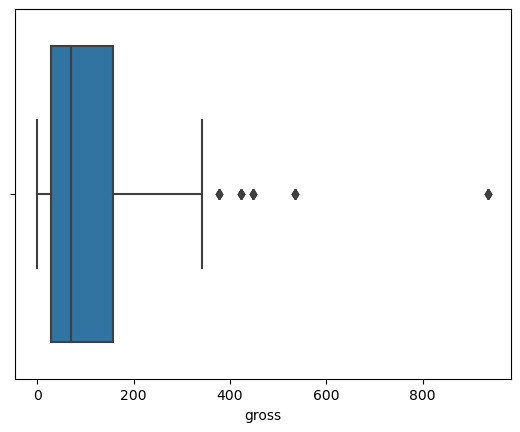

In [26]:
sns.boxplot(data=df,x='gross');
plt.show()

<AxesSubplot:xlabel='gross', ylabel='Count'>

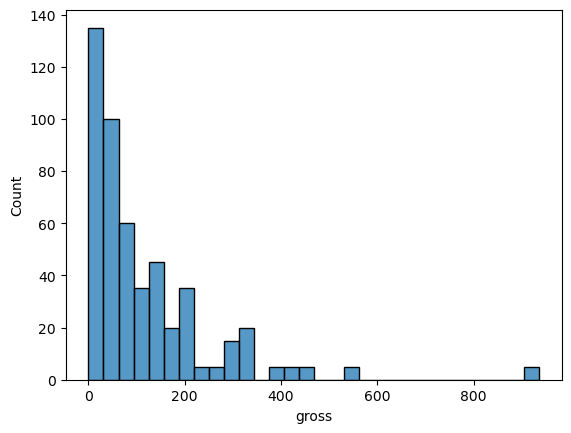

In [27]:
sns.histplot(data=df,x='gross')

In this plot we can observe that the gross of the movies between the <u>0-200M</u> are more compared to the gross from <b>400M</b>  

<AxesSubplot:xlabel='gross', ylabel='Density'>

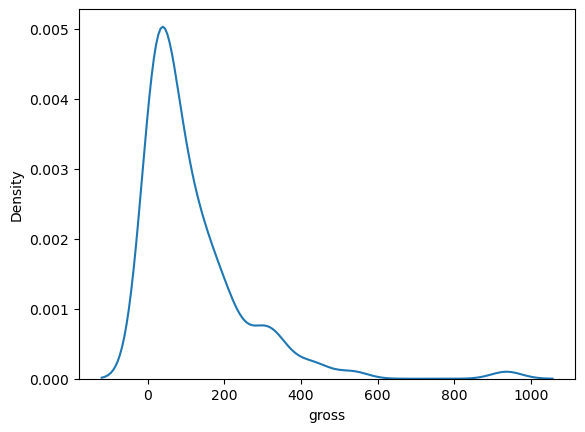

In [28]:

sns.kdeplot(data=df, x="gross")

<AxesSubplot:xlabel='year', ylabel='Count'>

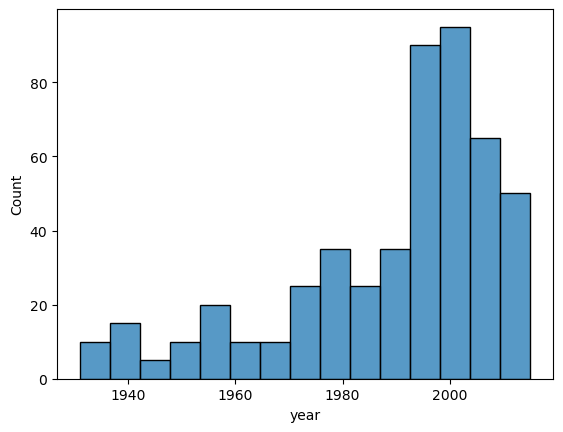

In [29]:
sns.histplot(data=df, x="year")

In this plot we have differentiate the year of the movie releases, in this plot we can observe the year of the movies are rapidly increased from <u>The mid 1980's to 2000's</u>

([<matplotlib.patches.Wedge at 0x27053aee070>,
 [Text(-0.20611945413751356, 1.080515974257694, 'R'),
  Text(-0.6741977411151988, -0.869170527500308, 'A'),
  Text(0.30689022851116454, -1.056323050796661, 'PG'),
  Text(0.9468162265587847, -0.5599455626442488, 'G'),
  Text(1.0913261702196657, -0.1378665666275816, 'U'),
  Text(1.0994572160221951, -0.034551847081228354, '18')],
 [Text(-0.11242879316591647, 0.5893723495951058, '56%'),
  Text(-0.36774422242647203, -0.4740930150001679, '17%'),
  Text(0.16739467009699882, -0.5761762095254515, '13%'),
  Text(0.5164452144866097, -0.3054248523514084, '11%'),
  Text(0.5952688201198176, -0.0751999454332263, '2%'),
  Text(0.5997039360121064, -0.018846462044306372, '1%')])

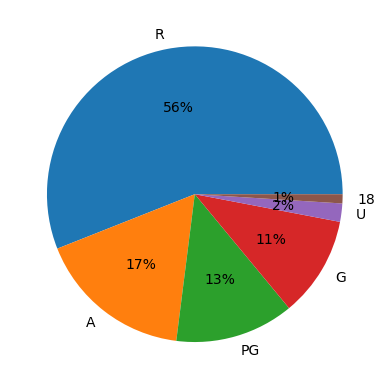

In [30]:
plt.pie(df['certificates'].value_counts(),labels=df['certificates'].value_counts().index,autopct='%0.0f%%')

By observing the pie chart of certificates there are 6 types of certificates they are

1)<b> R(restricted)</b>i.e childre under 17 require accompanying parent or adult guardian

2) <b>18</b> i.e films rated 18 are for adults, no one under 18 is allowed to see the film

3) <b>U </b> i.e films with the U certification are fit for unrestricted public exhibition and are family-friendly

4) <b>G</b> i.e anyone of the certificates with class-G designation on the face thereof,substantially in the form of exhibit A-1

5) <b>PG</b>   i.e  PG stands for parental guidence this means a film is suitable for general viewing, but some scenes may be unsuitable for younger children

6) <b>A </b> i.e it defines that the movie is for the only adults

* while observing the chart we can observe that the R certifications are more compared to other certifications

<AxesSubplot:xlabel='certificates', ylabel='count'>

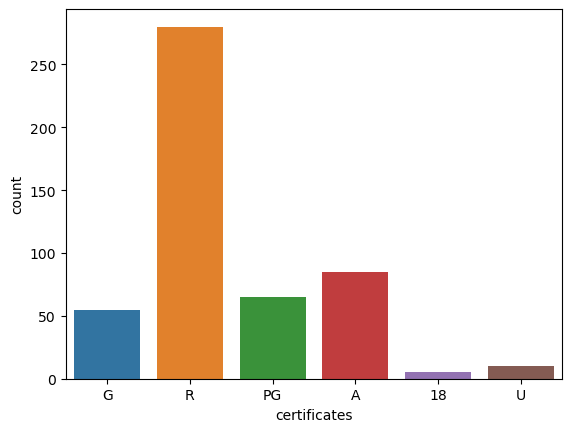

In [31]:
sns.countplot(data=df,x='certificates')

*  While observing the count plot we can observe that the<b> R certifications</b> are more compared to other certifications

# bi varient

<AxesSubplot:xlabel='year', ylabel='certificates'>

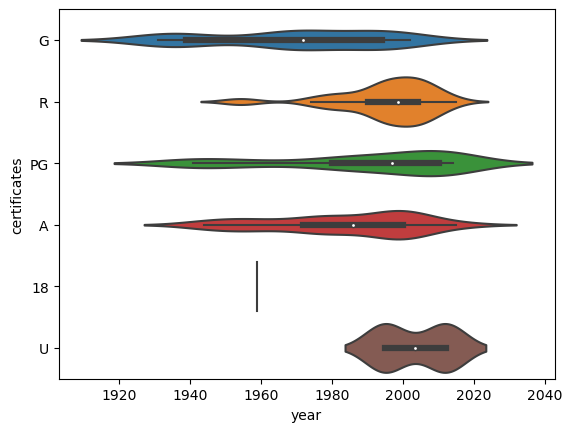

In [32]:
sns.violinplot(data=df,x='year',y='certificates')

In this violin plot we have differentiated the movie certifications change in the certian years intervals

*<b> R certification</b> movies got the drastic change from <u>1980's to 2020's</u>




<AxesSubplot:>

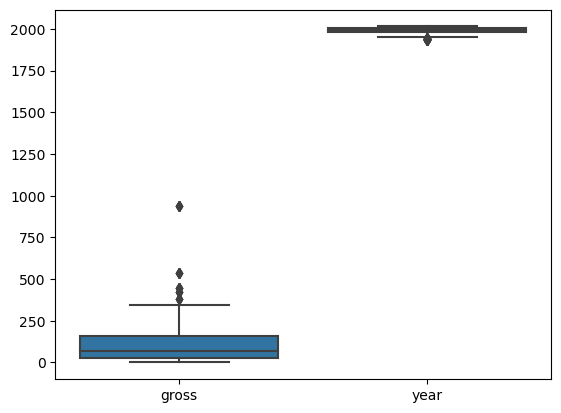

In [33]:
sns.boxplot(data=df.loc[:, ['gross','year']])

([<matplotlib.patches.Wedge at 0x27053d276a0>,
 [Text(0.8899186877588753, 0.6465637858537406, "(0.02, 'City Lights')"),
  Text(-0.3399187231970732, 1.046162158377023, "(115.65, 'District ')"),
  Text(-1.0999999999999988, -5.149471622296949e-08, "(148.48, 'As Good as It Gets')"),
  Text(-0.33991862524830174, -1.0461621902025062, "(141.32, 'Slumdog Millionaire')"),
  Text(0.8899187482945414, -0.6465637025335375, "(138.8, 'The King')")],
 [Text(0.4854101933230228, 0.35267115592022213, '20%'),
  Text(-0.18541021265294902, 0.5706339045692853, '20%'),
  Text(-0.5999999999999993, -2.808802703071063e-08, '20%'),
  Text(-0.1854101592263464, -0.5706339219286397, '20%'),
  Text(0.4854102263424771, -0.3526711104728386, '20%')])

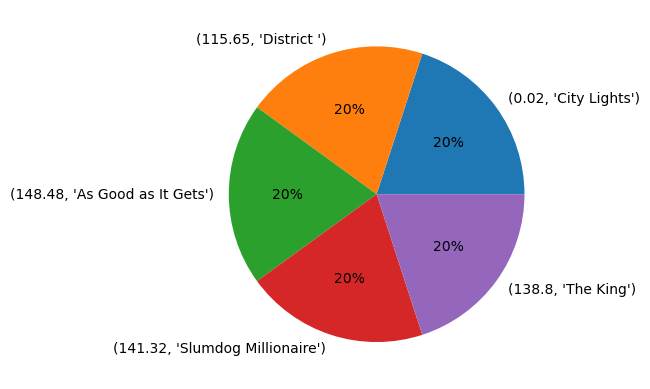

In [34]:
plt.pie(df[['gross','title']].value_counts()[:5],labels=df[['gross','title']].value_counts()[:5].index,autopct='%0.0f%%')

from the above pie chart we have details of top 5 movies and their grosses according to the IMDb wesite are


1) <b>As Good As It Gets</b> - this movie got the gross of <u>148.48M</u> 

2) <b>Slumdog Millionarie</b> - this movie got the gross of <u>141.32M </u>

3) <b>The king's Man</b>-  this movie got the gross of<u><u> 138.8M </u>

4) <b>District 9</b> -   this movie got the gross of <u>115.65M </u>

5) <b>City Lights</b>-   this movie got the gross of<u> 0.02M </u>






<AxesSubplot:xlabel='year', ylabel='certificates'>

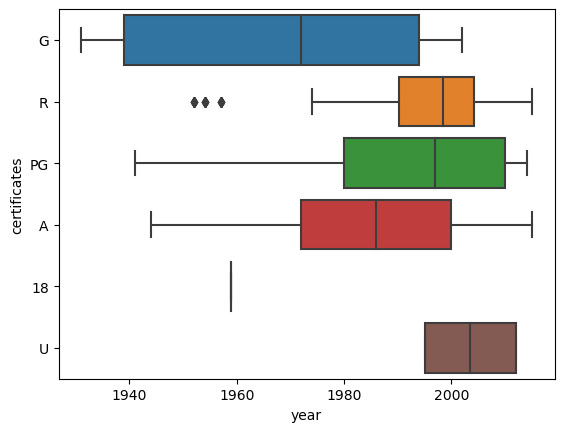

In [35]:
sns.boxplot(data=df,x='year',y='certificates')

([<matplotlib.patches.Wedge at 0x27055769cd0>,
 [Text(0.8899186877588753, 0.6465637858537406, "('100 ', 'To Have and Have Not')"),
  Text(-0.3399187231970732, 1.046162158377023, "('142 ', 'Forrest Gump')"),
  Text(-1.0999999999999988, -5.149471622296949e-08, "('152 ', 'The Dark Knight')"),
  Text(-0.33991862524830174, -1.0461621902025062, "('151 ', 'The Departed')"),
  Text(0.8899187482945414, -0.6465637025335375, "('150 ', 'The Pianist')")],
 [Text(0.4854101933230228, 0.35267115592022213, '20%'),
  Text(-0.18541021265294902, 0.5706339045692853, '20%'),
  Text(-0.5999999999999993, -2.808802703071063e-08, '20%'),
  Text(-0.1854101592263464, -0.5706339219286397, '20%'),
  Text(0.4854102263424771, -0.3526711104728386, '20%')])

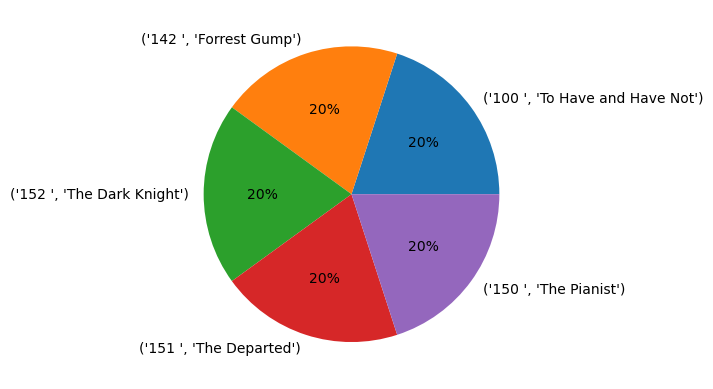

In [36]:
plt.pie(df[['runtime','title']].value_counts()[:5],labels=df[['runtime','title']].value_counts()[:5].index,autopct='%0.0f%%')

in this pie plot we can observe the top 5 movies with highest runtimes in the IMDb data that can be classified as

1) The movie <b>The Dark Knight</b> had a runtime of <u>152 minutes</u>


2) The movie <b>The Departed</b> had a runtime of  <u> 151 minutes</u>


3) The movie <b>The Pianist</b> had a runtime of <u> 150 minutes</u>


4) The movie<b> Forrest Gump</b> had a runtime of <u> 142 minutes</u>


5) The movie <b>To Have and Have Not</b> had a runtime of <u> 100 minutes</u>



## multi varient plot

<AxesSubplot:>

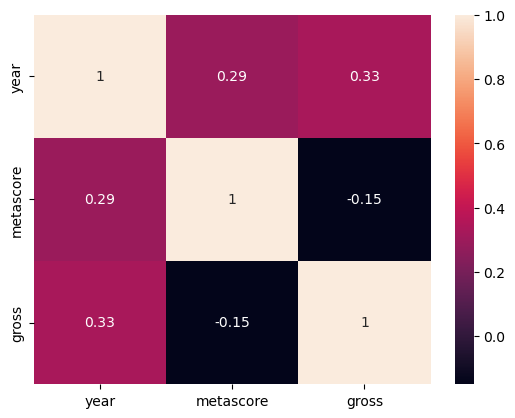

In [37]:

sns.heatmap(df.corr(),annot=True)


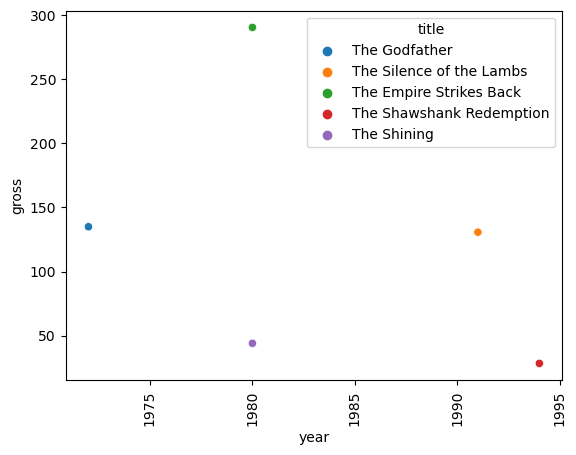

In [38]:
sns.scatterplot(data=df[:5],x='year',y='gross',hue='title')
plt.xticks(rotation=90)
plt.show()

From the scateer plot we are discussing about the  movie title,gross and the year

1) In the year mid 1950's the movie named <b>The Godfather</b> had the gross of nearly <u>150M </u>

2) In the year mid 1950's the movie named <b>The Silence of the Lambs</b> had the gross of nearly<u> 150M </u> (but lesser than the gross of Godfather movie)

3) In the year mid 1980's the movie named <b>The Empire Strikes Back</b> had the gross of nearly <u>300M </u>

4) In the year 1980 the movie named <b>The Shawshank Redemption</b>  had the gross of nearly <u>50M </u>

5) In the year mid 1980 the movie named<b> The Shining </b>had the gross of nearly <u>50M </u>(but i t is higher than the movie The Shawshank Redemption )




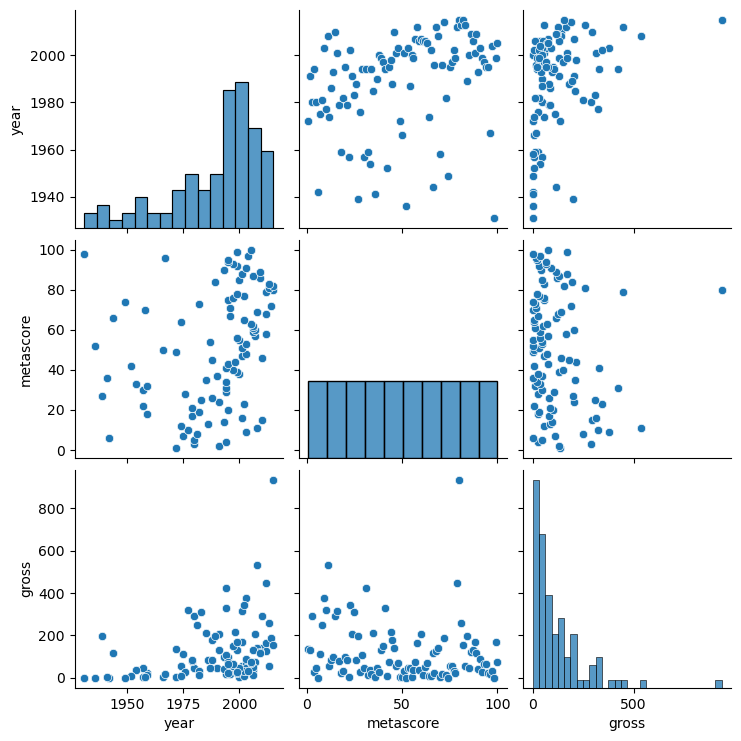

In [39]:
sns.pairplot(df)
plt.show()

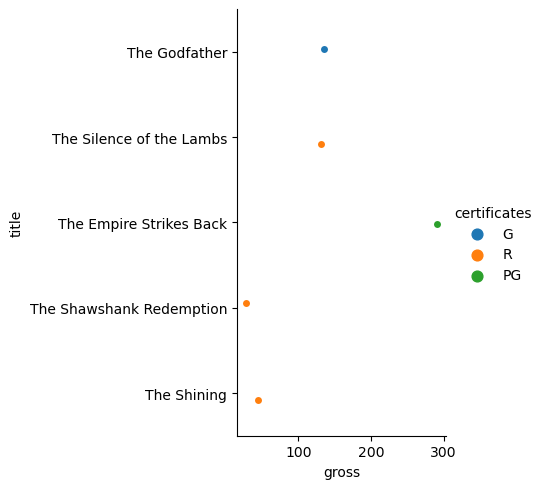

In [41]:
sns.catplot(data=df[:5],x='gross',y='title',hue='certificates')

From the scateer plot we are discussing about the movie title,gross and the year

1) The movie named <b>The Godfather</b> had the gross of nearly <u>150M</u> with the <b>G certification</b>

2) The movie named <b> The Silence of the Lambs </b> had the gross of nearly <u>150M</u> (but lesser than the gross of Godfather movie) with the<b> R certification</b>

3) The movie named <b> The Empire Strikes Back </b> had the gross of nearly <u>300M</u> with the<b> PG certification</b>

4) The movie named <b> The Shawshank Redemption </b> had the gross of nearly <u>50M</u> with the<b> R certification</b>

5) The movie named <b> The Shining </b> had the gross of nearly <u>50M</u>(but i t is higher than the movie The Shawshank Redemption ) with the <b>R certification</b>